Team Capybara
Yuxin Li, Yumi Jin, Yujia Yang, Yingyu Zhu

# Part 1: Training a CNN using CIFAR-10 Data

## 1. Load the dataset and check how the images look like

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Load the dataset
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the shape of the dataset, according to the read me, there should be 50000 training and 10000 testing
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


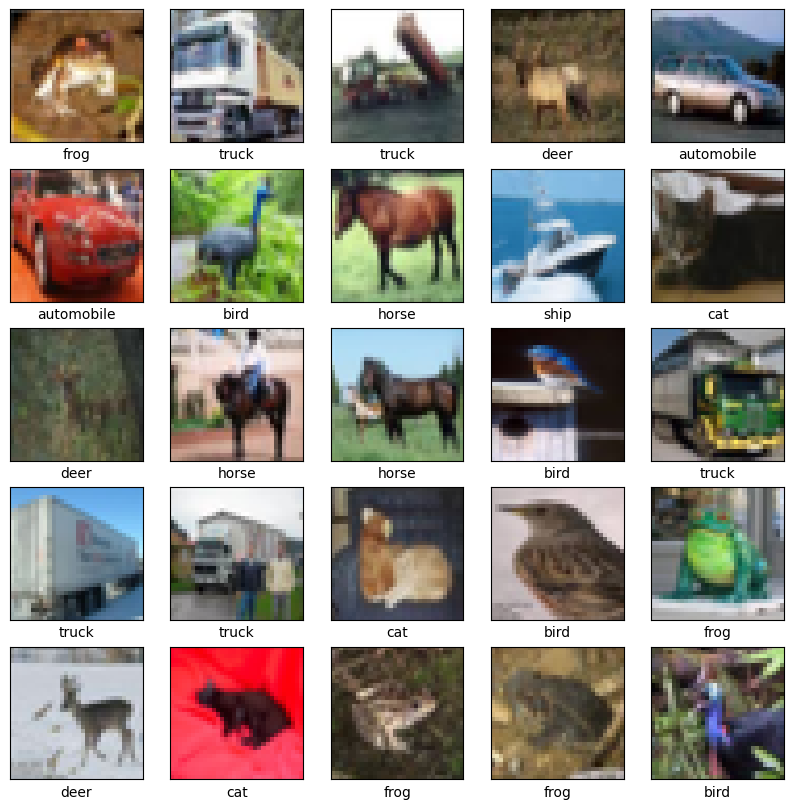

In [ ]:
# Create a list of class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize images from the dataset and display the first 25 and their class labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


## 2. Train a CNN with three hidden convolutional layers that use the ReLU activation function.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    # First convolutional layer with 64 11x11 filters and ReLU activation
    layers.Conv2D(64, (11, 11), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    # Second convolutional layer with 128 3x3 filters and ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Third convolutional layer with 128 3x3 filters and ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Average pooling layer
    layers.GlobalAveragePooling2D(),

    # Softmax layer
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.9056 - accuracy: 0.2854 - val_loss: 1.6884 - val_accuracy: 0.3770
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6344 - accuracy: 0.3995 - val_loss: 1.5381 - val_accuracy: 0.4311
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5267 - accuracy: 0.4430 - val_loss: 1.4806 - val_accuracy: 0.4536
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4456 - accuracy: 0.4754 - val_loss: 1.4127 - val_accuracy: 0.4889
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3829 - accuracy: 0.5005 - val_loss: 1.3788 - val_accuracy: 0.5048
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3274 - accuracy: 0.5226 - val_loss: 1.3035 - val_accuracy: 0.5357
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2761 - accuracy: 0.5434 - val_loss: 1.2765 - val_accurac

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 1.1742 - accuracy: 0.5868 - 737ms/epoch - 2ms/step
Test loss: 1.1742311716079712
Test accuracy: 0.5867999792098999


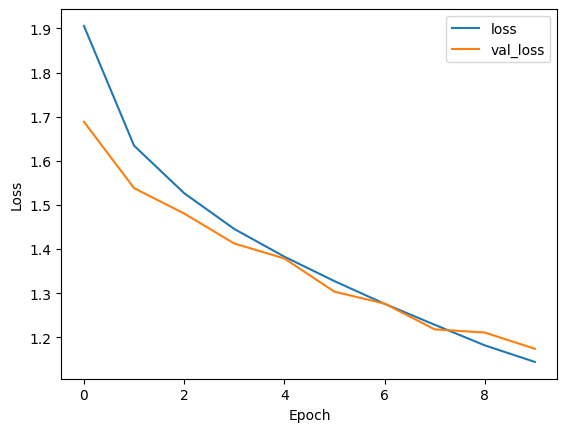

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


 The weights of the neural network are initialized automatically by TensorFlow's Keras library using the Glorot uniform method also known as Xavier uniform initialization. This method sets the initial random weights of the network layers in a way that helps the model learn efficiently during training.

The architecture and hyper parameters is consisted of 3 layers, convolutional layer that detect patterns in image, pooling layer which simplify image data by reducing the size, and lastly the dense layer which classifies the image into one of the ten categories. We start with big 11x11 filters to capture larger patterns, then changed to smaller 3x3 filters to detect the finer details. After some layers, we use pooling to compress the data, focusing on the most important features. The model is trained with an optimizer called Adam, which helps it learn efficiently, and we measure its performance using a method called sparse categorical crossentropy, which is good for tasks where each image belongs to just one category out of many.


Hyper Parameters are:
- Batch size = 128
- Epochs = 10
- Optimizer = Admams
- Loss function: Categorical Cross-Entropy

## 3. Visualize all of the 11×11×3 filters learned by the first convolutional layer as an RGB image array

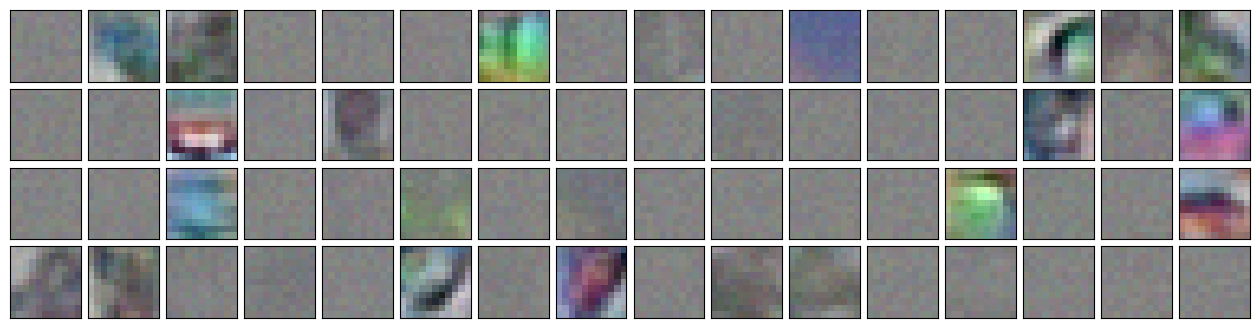

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Assuming 'model' is your trained model
filters, biases = model.layers[0].get_weights()

# Normalize the filters to the range 0-1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plotting the filters
n_filters = filters.shape[3]
n_rows = 4
n_cols = 16

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    # Only plot the valid filter indexes
    if i < n_filters:
        # Get the filter
        f = filters[:, :, :, i]

        # Set the scale of the images to be plotted to the [0, 1] range
        ax.imshow(f, aspect='auto')

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Display the figure
plt.show()


## 4. Using the same architecture, add in batch normalization between each of the hidden layers

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model_bn = models.Sequential([
    # First convolutional layer
    layers.Conv2D(64, (11, 11), input_shape=(32, 32, 3), use_bias=False),
    BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Second convolutional layer
    layers.Conv2D(128, (3, 3), use_bias=False),
    BatchNormalization(),
    layers.Activation('relu'),

    # Third convolutional layer
    layers.Conv2D(128, (3, 3), use_bias=False),
    BatchNormalization(),
    layers.Activation('relu'),

    # Global average pooling and output layer
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_bn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with batch normalization
history_bn = model_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.4780 - accuracy: 0.4639 - val_loss: 2.1150 - val_accuracy: 0.3360
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1666 - accuracy: 0.5856 - val_loss: 1.6702 - val_accuracy: 0.4591
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0321 - accuracy: 0.6356 - val_loss: 1.1778 - val_accuracy: 0.5782
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9389 - accuracy: 0.6673 - val_loss: 1.5250 - val_accuracy: 0.5043
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8666 - accuracy: 0.6953 - val_loss: 1.2995 - val_accuracy: 0.5417
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8082 - accuracy: 0.7161 - val_loss: 0.9906 - val_accuracy: 0.6564
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7609 - accuracy: 0.7339 - val_loss: 0.9860 - val_ac

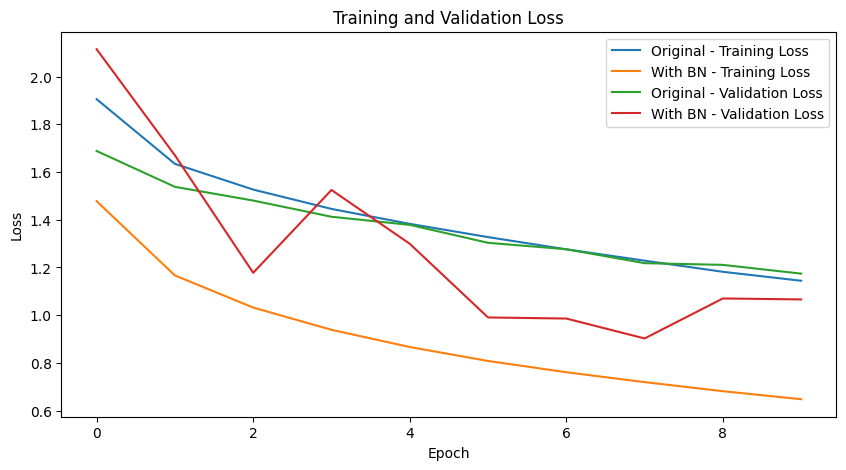

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Original - Training Loss')
plt.plot(history.history['val_loss'], label='Original - Validation Loss')
plt.plot(history_bn.history['loss'], label='Batch Norm - Training Loss')
plt.plot(history_bn.history['val_loss'], label='Batch Norm - Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


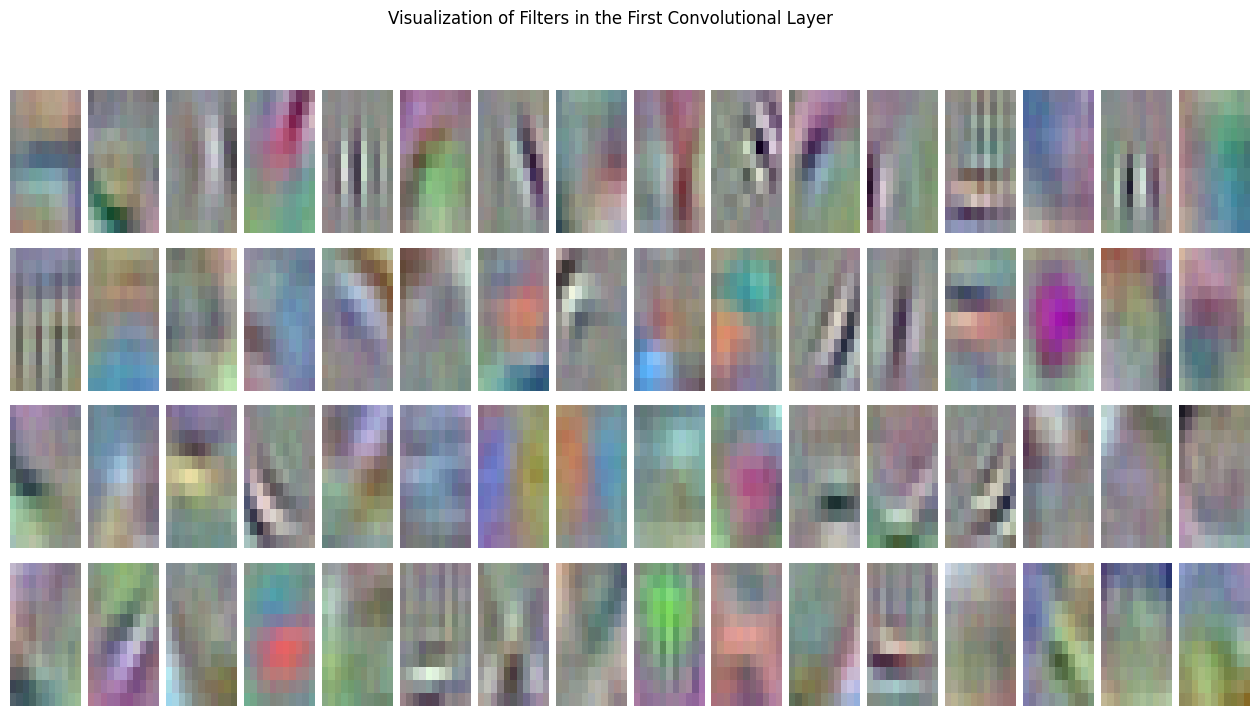

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_filters(model, layer_index=0):
    # Extract filters from the specified layer index
    filters = model.layers[layer_index].get_weights()[0]

    # Normalize filters to [0, 1] range for visualization
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # Number of filters
    num_filters = filters.shape[3]

    # Set up the grid for plotting
    fig, axes = plt.subplots(nrows=4, ncols=16, figsize=(16, 8))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    # Plot each filter
    for i in range(min(num_filters, 4 * 16)):
        ax = axes[i // 16, i % 16]
        ax.imshow(filters[:, :, :, i], aspect='auto')
        ax.axis('off')

    plt.suptitle("Visualization of Filters in the First Convolutional Layer")
    plt.show()

# Assuming 'model_bn' is your trained batch normalization model
visualize_filters(model_bn, layer_index=0)


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_bn.evaluate(x_test, y_test)

# Calculate the final error as 1 - test_accuracy
final_error = 1 - test_accuracy

# Print the results
print(f"Test Accuracy: {test_accuracy}")
print(f"Final Error: {final_error}")


313/313 [==============================] - 1s 3ms/step - loss: 1.0661 - accuracy: 0.6427
Test Accuracy: 0.6427000164985657
Final Error: 0.3572999835014343


- Test accuracy with batch normalization:0.6427000164985657
- Final test error: 0.3572999835014343

The model with batch normalization demonstrates higher accuracy and lower error rates. This improvement is attributed to batch normalization's ability to stabilize and accelerate training. By normalizing the activations at each layer, batch normalization helps mitigate internal covariate shift. This allows the model to use higher learning rates effectively, enhancing performance and reducing training time.

# Part 2: Training GAN using Fasion-MNIST Data

## Vanilla GAN

#### 1. Set up the Environment

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()
train_images = train_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)
BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Create TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#### 2. Define the Generator (G):

In [2]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(100,), use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Dense(1024, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Dense(28*28*1, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

#### 3. Define the Discriminator (D):

In [3]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.ReLU())
    model.add(layers.Dense(256, use_bias=False))
    model.add(layers.ReLU())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

#### 4. Loss and Optimizers

In [4]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


#### 5. Train the GAN

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


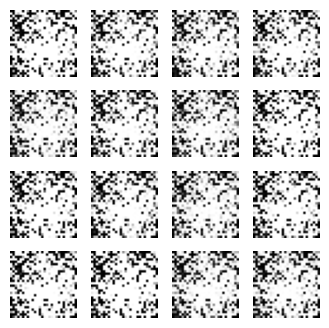

Epoch 1, Generator Loss: 2.8356246948242188, Discriminator Loss: 0.3699111342430115
Epoch 2, Generator Loss: 7.328187465667725, Discriminator Loss: 0.25068944692611694
Epoch 3, Generator Loss: 4.83665132522583, Discriminator Loss: 0.1726076751947403
Epoch 4, Generator Loss: 5.865604400634766, Discriminator Loss: 0.19441887736320496
Epoch 5, Generator Loss: 6.2798075675964355, Discriminator Loss: 0.2207757532596588
Epoch 6, Generator Loss: 7.206472873687744, Discriminator Loss: 0.12155159562826157
Epoch 7, Generator Loss: 11.11326789855957, Discriminator Loss: 0.10453192889690399
Epoch 8, Generator Loss: 7.894484996795654, Discriminator Loss: 0.11730649322271347
Epoch 9, Generator Loss: 5.582106590270996, Discriminator Loss: 0.1420375108718872
Epoch 10, Generator Loss: 8.31748104095459, Discriminator Loss: 0.1643371731042862
Epoch 11, Generator Loss: 5.118816375732422, Discriminator Loss: 0.12344896793365479
Epoch 12, Generator Loss: 6.124111175537109, Discriminator Loss: 0.134766414761

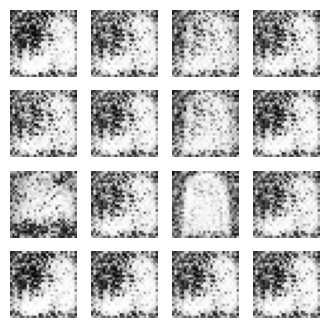

Epoch 26, Generator Loss: 5.041059494018555, Discriminator Loss: 0.48229238390922546
Epoch 27, Generator Loss: 4.6707234382629395, Discriminator Loss: 0.41891416907310486
Epoch 28, Generator Loss: 3.973004102706909, Discriminator Loss: 0.3242553174495697
Epoch 29, Generator Loss: 4.468490123748779, Discriminator Loss: 0.28706085681915283
Epoch 30, Generator Loss: 4.325370788574219, Discriminator Loss: 0.32667168974876404
Epoch 31, Generator Loss: 4.663595199584961, Discriminator Loss: 0.28650563955307007
Epoch 32, Generator Loss: 4.619117736816406, Discriminator Loss: 0.291907399892807
Epoch 33, Generator Loss: 4.25223970413208, Discriminator Loss: 0.35672324895858765
Epoch 34, Generator Loss: 4.116825580596924, Discriminator Loss: 0.3189535140991211
Epoch 35, Generator Loss: 4.530766010284424, Discriminator Loss: 0.3049779236316681
Epoch 36, Generator Loss: 5.264019012451172, Discriminator Loss: 0.32396894693374634
Epoch 37, Generator Loss: 5.052525997161865, Discriminator Loss: 0.326

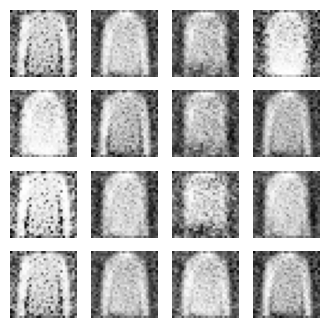

Epoch 50, Generator Loss: 2.291630983352661, Discriminator Loss: 0.7237461805343628


In [5]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

generator_losses = []
discriminator_losses = []

seed = tf.random.normal([num_examples_to_generate, noise_dim])

generator_losses = []
discriminator_losses = []

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def train(dataset, epochs):
    for epoch in range(epochs):
        gen_epoch_loss = 0
        disc_epoch_loss = 0
        num_batches = 0

        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            gen_epoch_loss += gen_loss
            disc_epoch_loss += disc_loss
            num_batches += 1

        gen_epoch_loss /= num_batches
        disc_epoch_loss /= num_batches

        generator_losses.append(gen_epoch_loss)
        discriminator_losses.append(disc_epoch_loss)

        # Produce images for the GIF as you go
        if epoch == 0 or epoch == epochs // 2 or epoch == epochs - 1:
            generate_and_save_images(generator, epoch + 1, seed)

        print(f'Epoch {epoch+1}, Generator Loss: {gen_epoch_loss}, Discriminator Loss: {disc_epoch_loss}')

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.show()

train(train_dataset, EPOCHS)

#### 6. Plot and Visualize

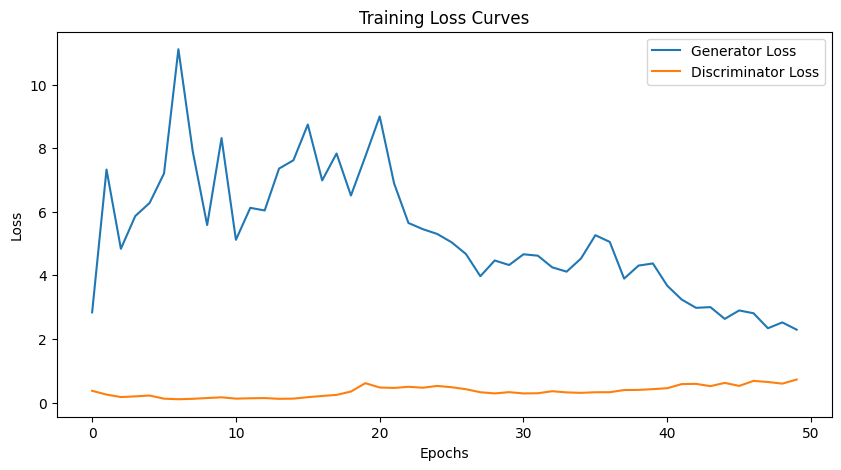

In [6]:
# Plot the training loss curves
plt.figure(figsize=(10, 5))
plt.plot(generator_losses, label='Generator Loss')
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Curves')
plt.show()

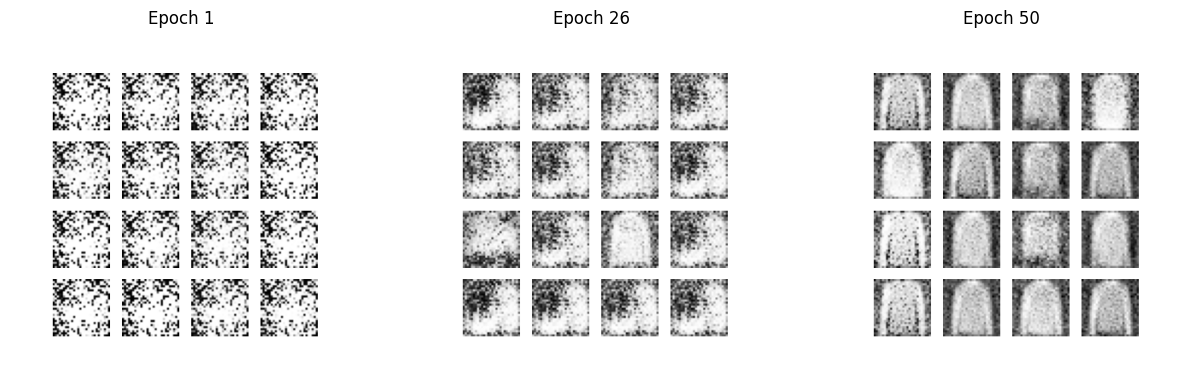

In [7]:
# Show generated samples from G at different training stages
import matplotlib.image as mpimg

def display_generated_images(epoch_numbers):
    fig, axes = plt.subplots(1, len(epoch_numbers), figsize=(15, 5))
    for i, epoch in enumerate(epoch_numbers):
        img = mpimg.imread(f'image_at_epoch_{epoch:04d}.png')
        axes[i].imshow(img)
        axes[i].set_title(f'Epoch {epoch}')
        axes[i].axis('off')
    plt.show()

# Example: Display images generated at the beginning, middle, and end of training
display_generated_images([1, EPOCHS // 2 + 1, EPOCHS])


## Mode Collapse in GANs

#### 1. Modify the Discriminator for Classification

Define the Classifier Model:

In [8]:
def make_classifier_model():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.ReLU())
    model.add(layers.Dense(256, use_bias=False))
    model.add(layers.ReLU())
    model.add(layers.Dense(10, activation='softmax'))
    return model

classifier = make_classifier_model()
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the Classifier on Fashion-MNIST Data

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

classifier.fit(train_images, train_labels, epochs=5, batch_size=256)
test_loss, test_acc = classifier.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
235/235 [==============================] - 2s 3ms/step - loss: 0.5169 - accuracy: 0.8201
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3686 - accuracy: 0.8667
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.8817
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3001 - accuracy: 0.8899
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8743
Test accuracy: 0.8743000030517578


#### 2. Generate and Classify Samples

Generate Samples Using the Trained Generator

In [10]:
noise = tf.random.normal([3000, noise_dim])
generated_images = generator(noise, training=False)

Classify the Generated Samples

In [11]:
predicted_labels = classifier.predict(generated_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

94/94 [==============================] - 0s 2ms/step


Plot the Histogram of Predicted Labels

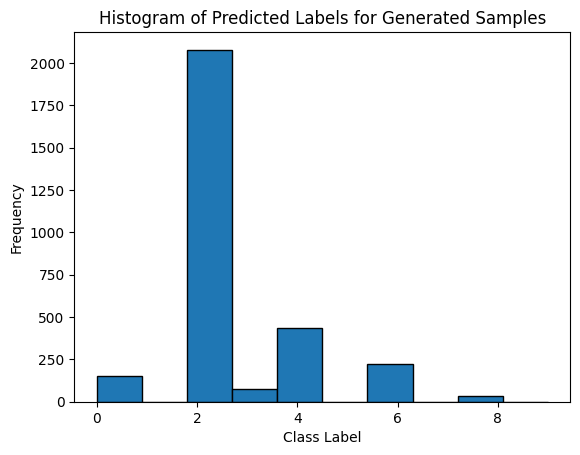

In [12]:
plt.hist(predicted_labels, bins=10, range=(0, 9), edgecolor='black')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels for Generated Samples')
plt.show()

#### 3. Implement and Train Unrolled GAN

Modify the Training Loop for Unrolled GAN

In [16]:
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

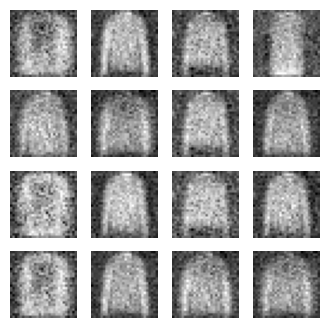

Epoch 1, Generator Loss: 1.8263236284255981, Discriminator Loss: 0.755190908908844
Epoch 2, Generator Loss: 1.363213062286377, Discriminator Loss: 0.9083271622657776
Epoch 3, Generator Loss: 1.4552775621414185, Discriminator Loss: 0.8616567254066467
Epoch 4, Generator Loss: 1.6094673871994019, Discriminator Loss: 0.8827176094055176
Epoch 5, Generator Loss: 1.5237672328948975, Discriminator Loss: 0.8346166610717773
Epoch 6, Generator Loss: 1.5951294898986816, Discriminator Loss: 0.8822116255760193
Epoch 7, Generator Loss: 1.5230199098587036, Discriminator Loss: 1.0365301370620728


In [ ]:
def train_unrolled_optimized(dataset, epochs, k=1):
    generator_losses = []
    discriminator_losses = []

    for epoch in range(epochs):
        gen_epoch_loss = 0
        disc_epoch_loss = 0
        num_batches = 0

        for image_batch in dataset:
            noise = tf.random.normal([BATCH_SIZE, noise_dim])
            generated_images = generator(noise, training=True)

            # Training the original discriminator
            with tf.GradientTape() as disc_tape:
                real_output = discriminator(image_batch, training=True)
                fake_output = discriminator(generated_images, training=True)
                disc_loss = discriminator_loss(real_output, fake_output)

            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

            # Unrolling steps
            D_unroll = tf.keras.models.clone_model(discriminator)
            D_unroll.build((None, 28, 28, 1))  # Ensure model is built
            D_unroll.set_weights(discriminator.get_weights())

            # Use a new optimizer for the unrolled discriminator
            unrolled_optimizer = tf.keras.optimizers.Adam(1e-4)

            for _ in range(k):
                with tf.GradientTape() as disc_tape_unroll:
                    real_output_unroll = D_unroll(image_batch, training=True)
                    fake_output_unroll = D_unroll(generated_images, training=True)
                    disc_loss_unroll = discriminator_loss(real_output_unroll, fake_output_unroll)

                gradients_of_discriminator_unroll = disc_tape_unroll.gradient(disc_loss_unroll, D_unroll.trainable_variables)
                unrolled_optimizer.apply_gradients(zip(gradients_of_discriminator_unroll, D_unroll.trainable_variables))

            # Training Generator with unrolled discriminator
            with tf.GradientTape() as gen_tape:
                generated_images = generator(noise, training=True)
                fake_output_unroll = D_unroll(generated_images, training=True)
                gen_loss = generator_loss(fake_output_unroll)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

            gen_epoch_loss += gen_loss
            disc_epoch_loss += disc_loss
            num_batches += 1

        gen_epoch_loss /= num_batches
        disc_epoch_loss /= num_batches

        generator_losses.append(gen_epoch_loss)
        discriminator_losses.append(disc_epoch_loss)

        # Produce images for the GIF as you go
        if epoch == 0 or epoch == epochs // 2 or epoch == epochs - 1:
            generate_and_save_images(generator, epoch + 1, seed)

        print(f'Epoch {epoch+1}, Generator Loss: {gen_epoch_loss}, Discriminator Loss: {disc_epoch_loss}')

    # Plot training losses
    plt.figure(figsize=(10, 5))
    plt.plot(generator_losses, label='Generator Loss')
    plt.plot(discriminator_losses, label='Discriminator Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss Curves')
    plt.show()

train_unrolled_optimized(train_dataset, EPOCHS, k=1)


Generate and Classify Samples with Unrolled GAN

In [ ]:
noise_unrolled = tf.random.normal([3000, noise_dim])
generated_images_unrolled = generator(noise_unrolled, training=False)
predicted_labels_unrolled = classifier.predict(generated_images_unrolled)
predicted_labels_unrolled = np.argmax(predicted_labels_unrolled, axis=1)

plt.hist(predicted_labels_unrolled, bins=10, range=(0, 9), edgecolor='black')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Labels for Generated Samples (Unrolled GAN)')
plt.show()